# Steps
- Import CSV
- Concatenate all reader digits in a new column
- Calculate for only last 7 days # What is the difference in accuracy when calculating with 14 days of data?
- Flag threshold
- Flag No Outliers (using Interquantile Range IQR)
- Flag Output Difference, > than previous entry
- Flag Output Difference, < than next entry
- ALL FLAGS CONSIDERED, find difference from output and previous output value
- Calculate liters used
- For liters used, Flag No Outliers (using Interquantile Range IQR)

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy.stats import iqr
import datetime
from datetime import datetime, timedelta

In [2]:
# Import CSV and Parse Timestamp to data type: datetime64[ns]
df = pd.read_csv('/Users/daviderubio/Desktop/Python_stuff/environments/ueiya_env/data/2022-07-06_data.csv', parse_dates=["timestamp"])

In [3]:
# Print
df.dtypes

d1                    int64
d2                    int64
d3                    int64
d4                    int64
d5                    int64
d6                    int64
timestamp    datetime64[ns]
d1_score            float64
d2_score            float64
d3_score            float64
d4_score            float64
d5_score            float64
dtype: object

In [4]:
# Concatenate all reader digits in a new column

df['output'] = df.d1.astype(str) + df.d2.astype(str) + df.d3.astype(str) + df.d4.astype(str) + df.d5.astype(str) + df.d6.astype(str)
df['output'] = df.output.astype(int)

In [5]:
# Print
df

,d1,d2,d3,d4,d5,d6,timestamp,d1_score,d2_score,d3_score,d4_score,d5_score,output
0,4,6,3,4,1,0,2022-04-08 14:11:15.088310,38684188.0,42425932.0,30956360.0,38985328.0,42985416.0,463410
1,4,6,3,4,1,0,2022-04-08 14:21:15.279858,40065080.0,42984956.0,30247470.0,41700912.0,40820020.0,463410
2,4,6,3,4,1,0,2022-04-08 14:31:14.798297,41338308.0,42900440.0,34809164.0,41812004.0,40809880.0,463410
3,4,6,3,4,1,0,2022-04-08 14:41:14.722131,39159420.0,42271496.0,34603732.0,41211804.0,40082644.0,463410
4,4,6,3,4,1,0,2022-04-08 14:51:13.854894,41791648.0,42544208.0,31450500.0,36712960.0,42196404.0,463410
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10599,4,7,9,8,0,0,2022-07-06 16:00:36.026470,41994032.0,38792744.0,23643302.0,34357720.0,40412112.0,479800
10600,4,7,5,8,0,0,2022-07-06 16:10:35.542424,42084420.0,40467172.0,26447016.0,33747980.0,37648780.0,475800
10601,4,7,0,8,0,0,2022-07-06 16:30:39.602441,37003296.0,45122604.0,25071282.0,34687876.0,44655720.0,470800
10602,4,7,8,8,0,0,2022-07-06 16:40:39.558097,43250544.0,40212664.0,26759772.0,34813448.0,41183420.0,478800


In [6]:
# Calculate for only last 30 days (or 90...)
df_timedelta = df[df.timestamp >= datetime.now() - timedelta(days=90)]
df_last_7_days = df_timedelta.copy()

In [7]:
# ## Flag Threshold - LAST 7 DAYS

# Threshold: Add TRUE column if score value is greater than Score_Threshold (testing various values)

#score_threshold = 35000000
#score_threshold = 32000000
score_threshold = 30000000

flag_low_score = lambda row: True if (row.d1_score > score_threshold and row.d2_score > score_threshold and row.d3_score > score_threshold and row.d4_score > score_threshold and row.d5_score > score_threshold) else False
df_last_7_days['flag_not_low_score'] = df_last_7_days.apply(flag_low_score, axis = 1)

# Create a new DF only with True Values
df_no_flag_threshold = df_last_7_days[df_last_7_days.flag_not_low_score == True]
df_threshold = df_no_flag_threshold.copy()

# Save to CSV, last 7 days, threshold
df_last_7_days.to_csv('last_7_days_data.csv', index=False)

In [8]:
# Print
df_threshold.reset_index()

,index,d1,d2,d3,d4,d5,d6,timestamp,d1_score,d2_score,d3_score,d4_score,d5_score,output,flag_not_low_score
0,0,4,6,3,4,1,0,2022-04-08 14:11:15.088310,38684188.0,42425932.0,30956360.0,38985328.0,42985416.0,463410,True
1,1,4,6,3,4,1,0,2022-04-08 14:21:15.279858,40065080.0,42984956.0,30247470.0,41700912.0,40820020.0,463410,True
2,2,4,6,3,4,1,0,2022-04-08 14:31:14.798297,41338308.0,42900440.0,34809164.0,41812004.0,40809880.0,463410,True
3,3,4,6,3,4,1,0,2022-04-08 14:41:14.722131,39159420.0,42271496.0,34603732.0,41211804.0,40082644.0,463410,True
4,4,4,6,3,4,1,0,2022-04-08 14:51:13.854894,41791648.0,42544208.0,31450500.0,36712960.0,42196404.0,463410,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7407,10566,4,7,0,1,0,0,2022-07-01 00:01:05.370641,39491912.0,45272336.0,34497516.0,49163832.0,45936980.0,470100,True
7408,10570,4,7,0,1,0,0,2022-07-01 00:40:55.943563,44604380.0,43749220.0,31437296.0,48441280.0,48560884.0,470100,True
7409,10574,4,7,0,1,1,0,2022-07-01 01:20:59.132257,41680256.0,45731480.0,30378614.0,52921824.0,50225388.0,470110,True
7410,10588,4,7,0,1,1,0,2022-07-01 03:40:58.340843,41039724.0,46404068.0,32524616.0,52957524.0,52783744.0,470110,True


In [9]:
## Flag No Outliers (Interquantile Range IQR)

# Find IQR
Q1 = df_threshold.output.quantile(0.25)
Q3 = df_threshold.output.quantile(0.75)
IQR = Q3 - Q1

df_threshold["output_not_outlier"] = df_threshold.output[~((df_threshold.output < (Q1 - 1.5 * IQR)) | (df_threshold.output > (Q3 + 1.5 * IQR)))]

#df_threshold["new_column"] = df_threshold.output[~((df_threshold.output < (Q1 - 1.5 * IQR)) | (df_threshold.output > (Q3 + 1.5 * IQR)))]


# Add Flag: Add new column with TRUE if value is not an outlier

flag_is_not_outlier = lambda row: True if (row.output == row.output_not_outlier) else False
df_threshold['flag_no_outlier'] = df_threshold.apply(flag_is_not_outlier, axis = 1)

# Create a new DF only with No Outliers Values
df_no_flag_no_outlier = df_threshold[df_threshold.flag_no_outlier == True]
df_no_outliers = df_no_flag_no_outlier.copy()

In [10]:
# Print
df_no_outliers.reset_index()

,index,d1,d2,d3,d4,d5,d6,timestamp,d1_score,d2_score,d3_score,d4_score,d5_score,output,flag_not_low_score,output_not_outlier,flag_no_outlier
0,0,4,6,3,4,1,0,2022-04-08 14:11:15.088310,38684188.0,42425932.0,30956360.0,38985328.0,42985416.0,463410,True,463410.0,True
1,1,4,6,3,4,1,0,2022-04-08 14:21:15.279858,40065080.0,42984956.0,30247470.0,41700912.0,40820020.0,463410,True,463410.0,True
2,2,4,6,3,4,1,0,2022-04-08 14:31:14.798297,41338308.0,42900440.0,34809164.0,41812004.0,40809880.0,463410,True,463410.0,True
3,3,4,6,3,4,1,0,2022-04-08 14:41:14.722131,39159420.0,42271496.0,34603732.0,41211804.0,40082644.0,463410,True,463410.0,True
4,4,4,6,3,4,1,0,2022-04-08 14:51:13.854894,41791648.0,42544208.0,31450500.0,36712960.0,42196404.0,463410,True,463410.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7406,10566,4,7,0,1,0,0,2022-07-01 00:01:05.370641,39491912.0,45272336.0,34497516.0,49163832.0,45936980.0,470100,True,470100.0,True
7407,10570,4,7,0,1,0,0,2022-07-01 00:40:55.943563,44604380.0,43749220.0,31437296.0,48441280.0,48560884.0,470100,True,470100.0,True
7408,10574,4,7,0,1,1,0,2022-07-01 01:20:59.132257,41680256.0,45731480.0,30378614.0,52921824.0,50225388.0,470110,True,470110.0,True
7409,10588,4,7,0,1,1,0,2022-07-01 03:40:58.340843,41039724.0,46404068.0,32524616.0,52957524.0,52783744.0,470110,True,470110.0,True


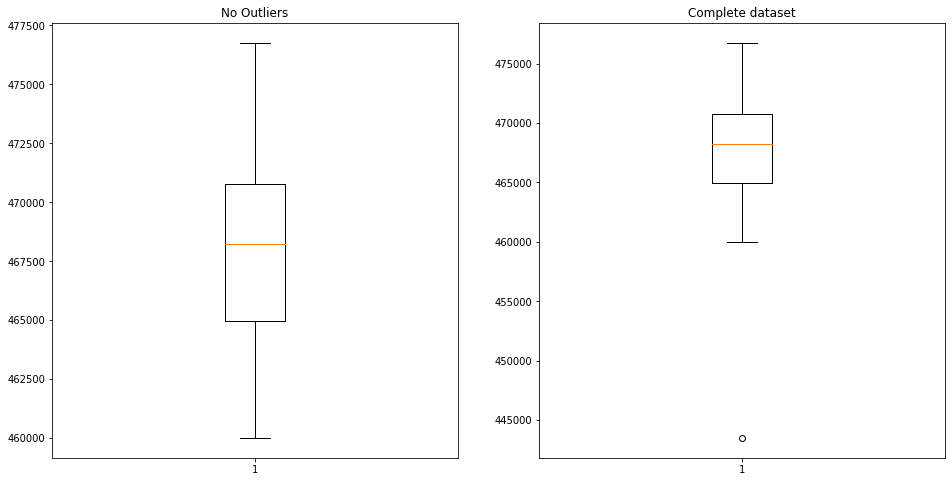

In [11]:
# Plot No Outliers vs Complete Dataset

ax = plt.figure(figsize=(16,8))
plt.subplot(1, 2, 1) # row 1, col 2 index 1
plt.boxplot(df_no_outliers.output)
plt.title("No Outliers")
#plt.xlabel('X-axis ')
#plt.ylabel('Y-axis ')

plt.subplot(1, 2, 2) # index 2
plt.boxplot(df_threshold.output)
plt.title("Complete dataset")
#plt.xlabel('X-axis ')
#plt.ylabel('Y-axis ')

plt.show()

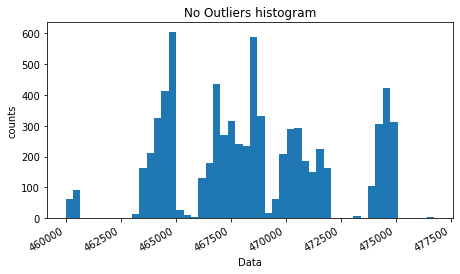

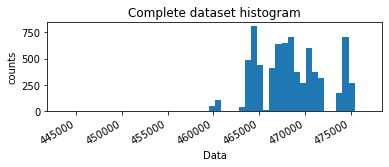

In [12]:
# Plot No Outliers Histogram vs Complete Dataset Histogram

ax = plt.figure(figsize=(16,4))

plt.subplot(1, 2, 1) # row 1, col 2 index 1
plt.hist(df_no_outliers.output, density=False, bins=50)  # density=False would make counts, True counts probability
plt.ylabel('counts') #Use if density is true
plt.xlabel('Data');
plt.title("No Outliers histogram")
plt.gcf().autofmt_xdate()
plt.show()

plt.subplot(2, 1, 2) # index 2
plt.hist(df_threshold.output, density=False, bins=50)  # density=False would make counts, True counts probability
plt.ylabel('counts') #Use if density is true
plt.xlabel('Data');
plt.title("Complete dataset histogram")
plt.gcf().autofmt_xdate()
plt.show()

plt.show()

# How does the data look like, plotted by date / output value?

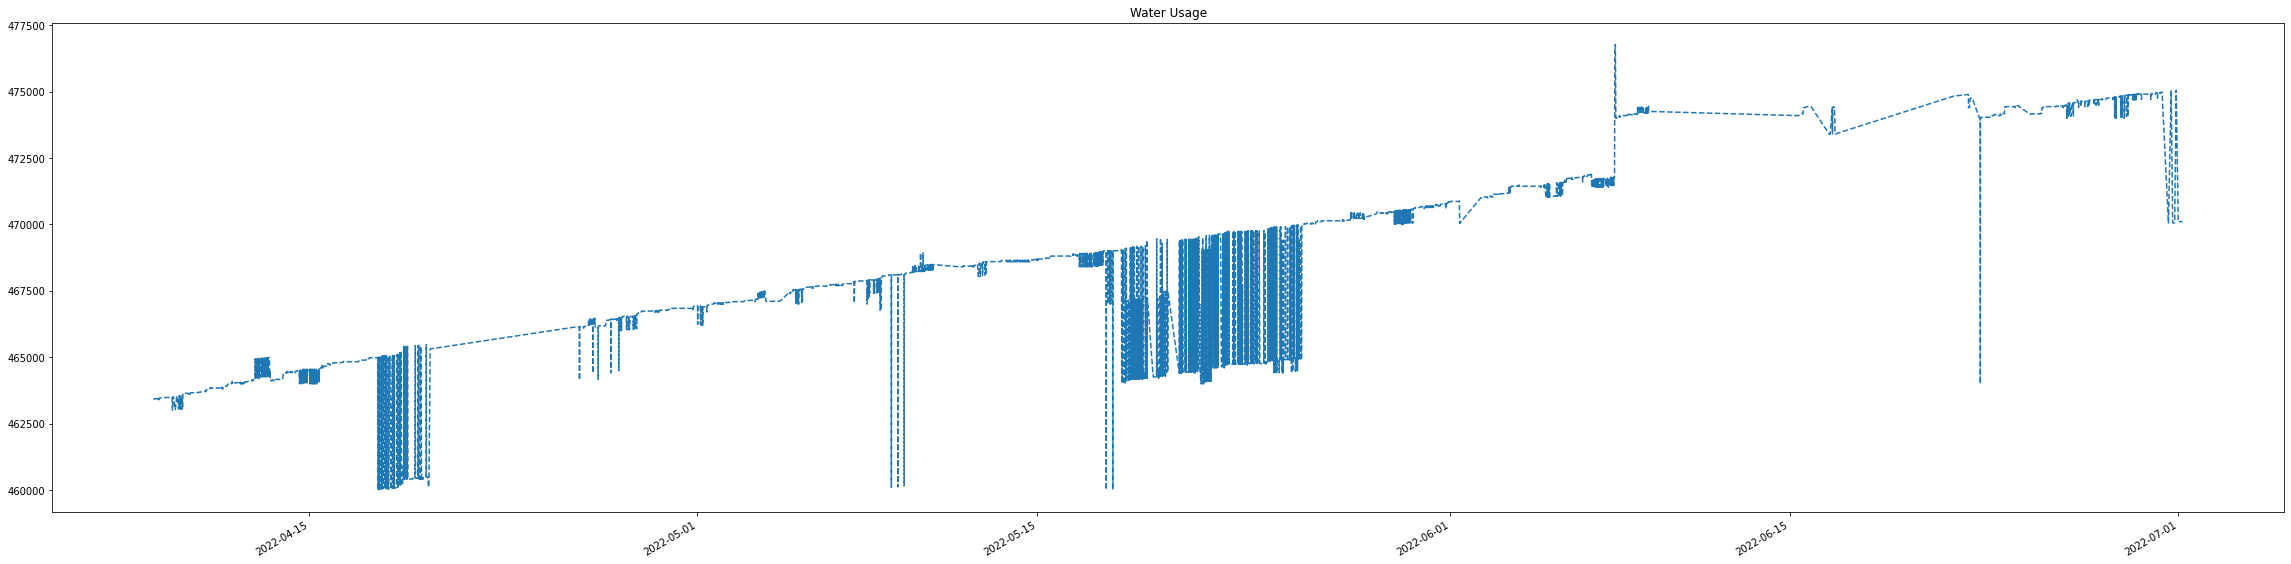

In [13]:
ax = plt.figure(figsize=(40,10))
plt.subplot(1, 1, 1) # row 1, col 2 index 1
#plt.bar(df_no_outliers.timestamp, df_no_outliers.output)
plt.plot(df_no_outliers.timestamp, df_no_outliers.output, '--')

plt.title("Water Usage")
plt.gcf().autofmt_xdate()
plt.show()

# What is the average of Output value?

In [14]:
average_output_value = df_no_outliers.output.mean()
print(average_output_value)

468476.1786533531


In [15]:
## Flag Output Difference, > than previous entry

# Find difference from output and previous output value
df_no_outliers.loc[:, 'output_greater_than_previous'] = df_no_outliers['output'].shift(periods=1)

# Flag difference, output is >= than previous output value
#flag_diff = lambda row: True if (row.output >= row.output_diff) else False
flag_greater_than = lambda row: True if (row.output > row.output_greater_than_previous) else False
df_no_outliers['flag_greater_than_previous'] = df_no_outliers.apply(flag_greater_than, axis = 1)

# Create a new DF only with True Values
df_no_flag_greater_than = df_no_outliers[df_no_outliers.flag_greater_than_previous == True]
df_greater_than = df_no_flag_greater_than.copy()

In [16]:
## Flag Output Difference, < than next entry

# Find difference from output and previous output value
df_greater_than.loc[:, 'output_less_than_next'] = df_greater_than['output'].shift(periods=-1)

# Flag difference, output is < than next entry
flag_less_than = lambda row: True if (row.output < row.output_less_than_next) else False
df_greater_than['flag_less_than_next'] = df_greater_than.apply(flag_less_than, axis = 1)

# Create a new DF only with True Values
df_no_flag_less_than = df_greater_than[df_greater_than.flag_less_than_next == True]
df_digested = df_no_flag_less_than.copy()

In [17]:
# Print
df_digested.reset_index()

,index,d1,d2,d3,d4,d5,d6,timestamp,d1_score,d2_score,...,d4_score,d5_score,output,flag_not_low_score,output_not_outlier,flag_no_outlier,output_greater_than_previous,flag_greater_than_previous,output_less_than_next,flag_less_than_next
0,20,4,6,3,4,4,0,2022-04-08 17:31:13.699081,41947564.0,43434752.0,...,41939432.0,43908432.0,463440,True,463440.0,True,463430.0,True,463450.0,True
1,27,4,6,3,4,5,0,2022-04-08 18:41:14.582059,40914564.0,41812212.0,...,43833808.0,32907196.0,463450,True,463450.0,True,463400.0,True,463460.0,True
2,35,4,6,3,4,6,0,2022-04-08 20:01:13.854195,41335236.0,41073520.0,...,40765524.0,41324632.0,463460,True,463460.0,True,463400.0,True,463470.0,True
3,45,4,6,3,4,7,0,2022-04-08 21:41:12.000785,40920472.0,45532636.0,...,42380532.0,52894744.0,463470,True,463470.0,True,463460.0,True,463480.0,True
4,50,4,6,3,4,8,0,2022-04-08 22:31:15.105852,40968320.0,43367548.0,...,41780216.0,39481836.0,463480,True,463480.0,True,463470.0,True,463490.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558,10404,4,7,4,9,1,0,2022-06-29 21:00:46.416458,44985916.0,45621252.0,...,37639884.0,34081164.0,474910,True,474910.0,True,474710.0,True,474940.0,True
559,10409,4,7,4,9,4,0,2022-06-29 21:50:55.086001,43027432.0,43115124.0,...,34354020.0,39844436.0,474940,True,474940.0,True,474910.0,True,474960.0,True
560,10458,4,7,4,9,6,0,2022-06-30 06:01:01.502093,45281996.0,43977324.0,...,36843928.0,36857176.0,474960,True,474960.0,True,474940.0,True,474980.0,True
561,10463,4,7,4,9,8,0,2022-06-30 06:50:56.550775,45150544.0,42920376.0,...,33017938.0,35911580.0,474980,True,474980.0,True,474960.0,True,474990.0,True


# Plot Histogram of Output Values

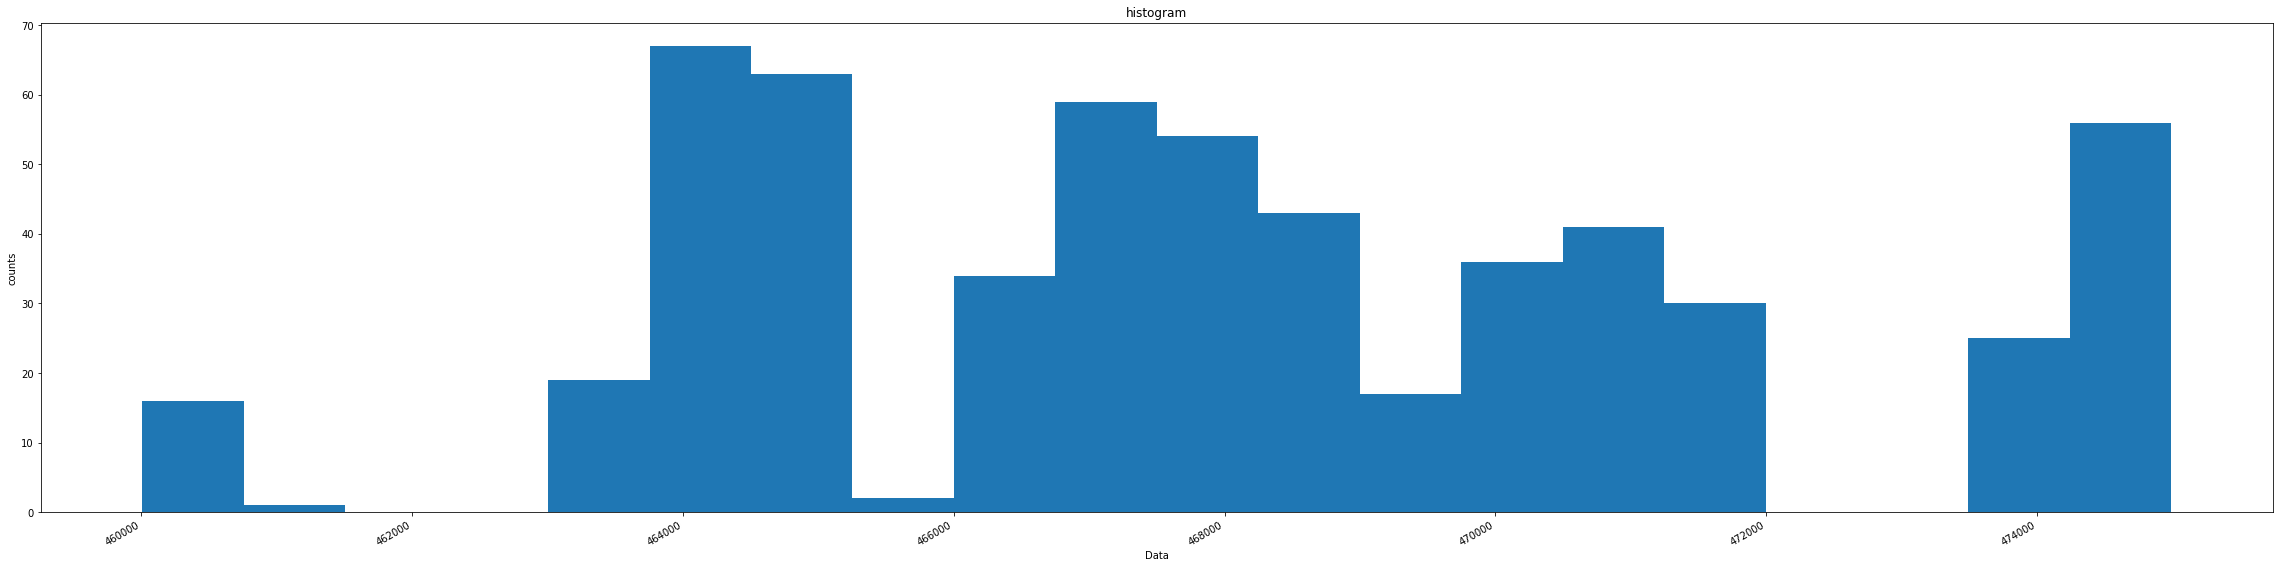

In [18]:
ax = plt.figure(figsize=(40,10))

plt.hist(df_digested.output, density=False, bins=20)  # density=False would make counts, True counts probability
#plt.ylabel('Probability') #Use if density is true
plt.ylabel('counts') #Use if density is true
plt.xlabel('Data');
plt.title("histogram")
plt.gcf().autofmt_xdate()
plt.show()

In [19]:
# ALL FLAGS CONSIDERED, find difference from output and previous output value
df_digested.loc[:, 'all_flags_output_diff'] = df_digested['output'].shift(periods=1)

In [20]:
# Print
df_digested.reset_index()

,index,d1,d2,d3,d4,d5,d6,timestamp,d1_score,d2_score,...,d5_score,output,flag_not_low_score,output_not_outlier,flag_no_outlier,output_greater_than_previous,flag_greater_than_previous,output_less_than_next,flag_less_than_next,all_flags_output_diff
0,20,4,6,3,4,4,0,2022-04-08 17:31:13.699081,41947564.0,43434752.0,...,43908432.0,463440,True,463440.0,True,463430.0,True,463450.0,True,NaN
1,27,4,6,3,4,5,0,2022-04-08 18:41:14.582059,40914564.0,41812212.0,...,32907196.0,463450,True,463450.0,True,463400.0,True,463460.0,True,463440.0
2,35,4,6,3,4,6,0,2022-04-08 20:01:13.854195,41335236.0,41073520.0,...,41324632.0,463460,True,463460.0,True,463400.0,True,463470.0,True,463450.0
3,45,4,6,3,4,7,0,2022-04-08 21:41:12.000785,40920472.0,45532636.0,...,52894744.0,463470,True,463470.0,True,463460.0,True,463480.0,True,463460.0
4,50,4,6,3,4,8,0,2022-04-08 22:31:15.105852,40968320.0,43367548.0,...,39481836.0,463480,True,463480.0,True,463470.0,True,463490.0,True,463470.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558,10404,4,7,4,9,1,0,2022-06-29 21:00:46.416458,44985916.0,45621252.0,...,34081164.0,474910,True,474910.0,True,474710.0,True,474940.0,True,474910.0
559,10409,4,7,4,9,4,0,2022-06-29 21:50:55.086001,43027432.0,43115124.0,...,39844436.0,474940,True,474940.0,True,474910.0,True,474960.0,True,474910.0
560,10458,4,7,4,9,6,0,2022-06-30 06:01:01.502093,45281996.0,43977324.0,...,36857176.0,474960,True,474960.0,True,474940.0,True,474980.0,True,474940.0
561,10463,4,7,4,9,8,0,2022-06-30 06:50:56.550775,45150544.0,42920376.0,...,35911580.0,474980,True,474980.0,True,474960.0,True,474990.0,True,474960.0


In [21]:
# Calculate liters used
#liters_difference = lambda row: (row.output -  row.all_flags_output_diff)
liters_difference = lambda row: (row.output -  row.all_flags_output_diff) if (row.output > row.all_flags_output_diff) else 0

df_digested['liters_used'] = df_digested.apply(liters_difference, axis = 1)

In [22]:
## Liters used: Flag No Outliers (Interquantile Range IQR)

# Find IQR
Q1 = df_digested.liters_used.quantile(0.25)
Q3 = df_digested.liters_used.quantile(0.75)
IQR = Q3 - Q1

df_digested["liters_not_outlier"] = df_digested.liters_used[~((df_digested.liters_used < (Q1 - 1.5 * IQR)) | (df_digested.liters_used > (Q3 + 1.5 * IQR)))]

# Add Flag: Add new column with TRUE if value is not an outlier

flag_not_outlier_liters = lambda row: True if (row.liters_used == row.liters_not_outlier) else False
df_digested['flag_liters_not_outlier'] = df_digested.apply(flag_not_outlier_liters, axis = 1)

# Create a new DF only with No Outliers Liter Values
df_liters_no_flag_no_outlier = df_digested[df_digested.flag_liters_not_outlier == True]
df_clean = df_liters_no_flag_no_outlier.copy()

In [23]:
# Sum Liters used
sum_liters_used = df_clean.liters_used.sum()

In [24]:
# Print
print(sum_liters_used) # As of 2022-05-24, the sum is not accurate to the water usage real-life consumtion

6830.0


In [25]:
# Print
df_clean.reset_index()

,index,d1,d2,d3,d4,d5,d6,timestamp,d1_score,d2_score,...,output_not_outlier,flag_no_outlier,output_greater_than_previous,flag_greater_than_previous,output_less_than_next,flag_less_than_next,all_flags_output_diff,liters_used,liters_not_outlier,flag_liters_not_outlier
0,20,4,6,3,4,4,0,2022-04-08 17:31:13.699081,41947564.0,43434752.0,...,463440.0,True,463430.0,True,463450.0,True,NaN,0.0,0.0,True
1,27,4,6,3,4,5,0,2022-04-08 18:41:14.582059,40914564.0,41812212.0,...,463450.0,True,463400.0,True,463460.0,True,463440.0,10.0,10.0,True
2,35,4,6,3,4,6,0,2022-04-08 20:01:13.854195,41335236.0,41073520.0,...,463460.0,True,463400.0,True,463470.0,True,463450.0,10.0,10.0,True
3,45,4,6,3,4,7,0,2022-04-08 21:41:12.000785,40920472.0,45532636.0,...,463470.0,True,463460.0,True,463480.0,True,463460.0,10.0,10.0,True
4,50,4,6,3,4,8,0,2022-04-08 22:31:15.105852,40968320.0,43367548.0,...,463480.0,True,463470.0,True,463490.0,True,463470.0,10.0,10.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489,10404,4,7,4,9,1,0,2022-06-29 21:00:46.416458,44985916.0,45621252.0,...,474910.0,True,474710.0,True,474940.0,True,474910.0,0.0,0.0,True
490,10409,4,7,4,9,4,0,2022-06-29 21:50:55.086001,43027432.0,43115124.0,...,474940.0,True,474910.0,True,474960.0,True,474910.0,30.0,30.0,True
491,10458,4,7,4,9,6,0,2022-06-30 06:01:01.502093,45281996.0,43977324.0,...,474960.0,True,474940.0,True,474980.0,True,474940.0,20.0,20.0,True
492,10463,4,7,4,9,8,0,2022-06-30 06:50:56.550775,45150544.0,42920376.0,...,474980.0,True,474960.0,True,474990.0,True,474960.0,20.0,20.0,True


# Plot Graphs

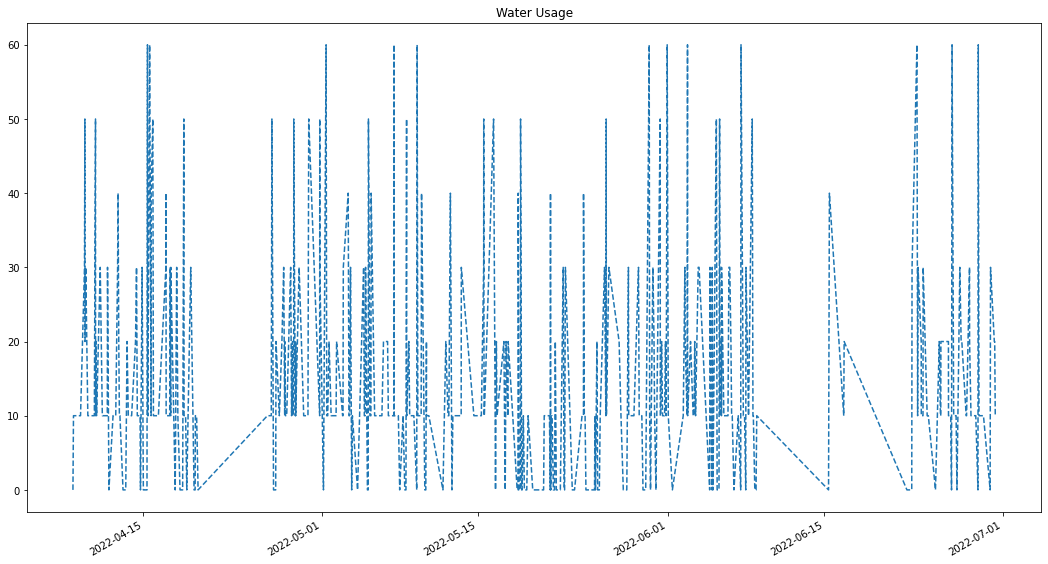

In [26]:
ax = plt.figure(figsize=(40,10))
plt.subplot(1, 2, 1) # row 1, col 2 index 1
plt.plot(df_clean.timestamp, df_clean.liters_used, '--')
plt.title("Water Usage")
plt.gcf().autofmt_xdate()
plt.show()

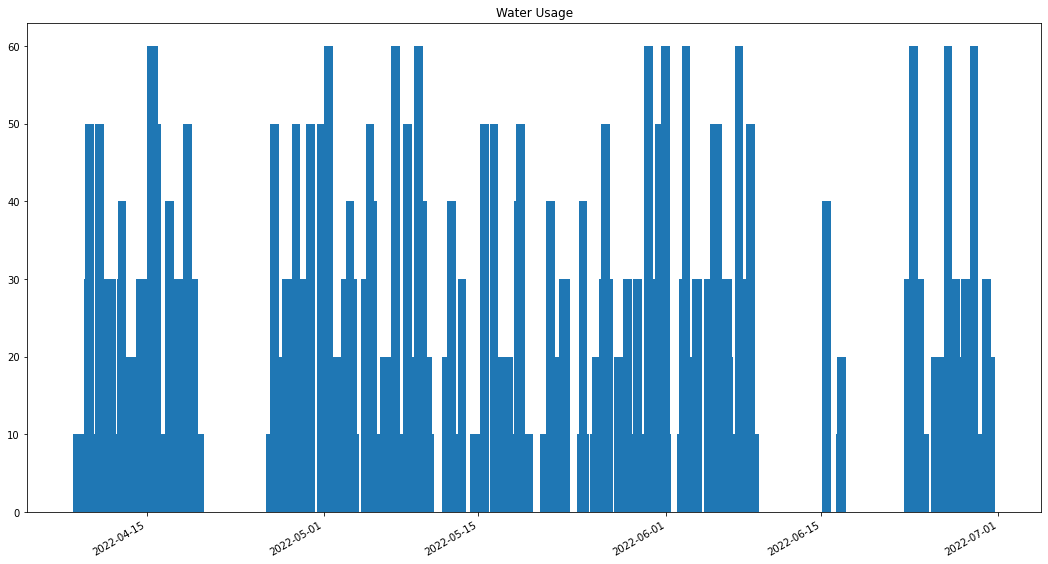

In [27]:
ax = plt.figure(figsize=(40,10))
plt.subplot(1, 2, 1) # row 1, col 2 index 1
plt.bar(df_clean.timestamp, df_clean.liters_used)
plt.title("Water Usage")
plt.gcf().autofmt_xdate()
plt.show()

In [28]:
# Save to CSV    
df_clean.to_csv('2022-07-06_digested_data.csv', index=False)